In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [2]:
cd ../

/mnt/c/Users/jongsu/documents/2024_2/project1/dl_imp


In [3]:
df = pd.read_csv('./data/total/total_data.csv')

In [4]:
df.head()

,Unnamed: 0,Label,Frame,Nose_x,Nose_y,Nose_z,Nose_visibility,Left Eye Inner_x,Left Eye Inner_y,Left Eye Inner_z,...,Right Foot Index_visibility,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143
0,0,step,1,0.648874,0.288281,0.078375,0.999666,0.649004,0.282681,0.068852,...,0.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,step,2,0.646172,0.284948,0.022417,0.999081,0.646540,0.279290,0.011850,...,0.919670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,step,3,0.641190,0.279885,0.013505,0.999011,0.642214,0.275077,0.003106,...,0.921553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,step,4,0.638023,0.278490,0.029947,0.999083,0.638835,0.273730,0.019140,...,0.922951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,step,5,0.633434,0.275024,0.023506,0.999149,0.634164,0.270313,0.013688,...,0.926082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(columns=['Unnamed: 135', 'Unnamed: 136',
       'Unnamed: 137', 'Unnamed: 138', 'Unnamed: 139', 'Unnamed: 140',
       'Unnamed: 141', 'Unnamed: 142', 'Unnamed: 143', 'Unnamed: 0'], axis=1)
df

,Label,Frame,Nose_x,Nose_y,Nose_z,Nose_visibility,Left Eye Inner_x,Left Eye Inner_y,Left Eye Inner_z,Left Eye Inner_visibility,...,Right Heel_z,Right Heel_visibility,Left Foot Index_x,Left Foot Index_y,Left Foot Index_z,Left Foot Index_visibility,Right Foot Index_x,Right Foot Index_y,Right Foot Index_z,Right Foot Index_visibility
0,step,1,0.648874,0.288281,0.078375,0.999666,0.649004,0.282681,0.068852,0.999791,...,-0.045735,0.984885,0.656172,0.482029,0.010179,0.964742,0.725682,0.496969,-0.053453,0.926667
1,step,2,0.646172,0.284948,0.022417,0.999081,0.646540,0.279290,0.011850,0.999248,...,0.021821,0.980697,0.652364,0.481814,0.055039,0.957060,0.719685,0.492456,0.012921,0.919670
2,step,3,0.641190,0.279885,0.013505,0.999011,0.642214,0.275077,0.003106,0.999206,...,0.030662,0.978013,0.650032,0.480069,0.061149,0.956163,0.711257,0.486973,0.021146,0.921553
3,step,4,0.638023,0.278490,0.029947,0.999083,0.638835,0.273730,0.019140,0.999267,...,0.008026,0.976647,0.646908,0.478127,0.040590,0.956966,0.704286,0.482374,0.000934,0.922951
4,step,5,0.633434,0.275024,0.023506,0.999149,0.634164,0.270313,0.013688,0.999322,...,0.009224,0.975664,0.644056,0.477074,0.038813,0.958821,0.695693,0.480755,0.000994,0.926082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62648,jump,116,0.574775,0.368235,-0.086111,0.997862,0.576780,0.360551,-0.094927,0.998144,...,0.225913,0.582580,0.573598,0.658989,0.073421,0.949217,0.568190,0.643400,0.206908,0.713479
62649,jump,117,0.579735,0.370851,-0.084412,0.997954,0.581703,0.363164,-0.093414,0.998192,...,0.206766,0.597621,0.581658,0.663905,0.046970,0.952519,0.571453,0.646194,0.186276,0.730089
62650,jump,118,0.583178,0.371905,-0.089629,0.998078,0.585457,0.364254,-0.098854,0.998275,...,0.206683,0.622501,0.587681,0.664693,0.036304,0.956209,0.574134,0.646979,0.186033,0.751237
62651,jump,119,0.586235,0.373957,-0.094196,0.998183,0.589069,0.366135,-0.103514,0.998327,...,0.210295,0.648423,0.594330,0.666866,0.019750,0.960005,0.577965,0.648006,0.188566,0.772112


In [6]:
encoder = LabelEncoder()
encoder.fit(df['Label'])
df["act"] = encoder.transform(df['Label'])
df

,Label,Frame,Nose_x,Nose_y,Nose_z,Nose_visibility,Left Eye Inner_x,Left Eye Inner_y,Left Eye Inner_z,Left Eye Inner_visibility,...,Right Heel_visibility,Left Foot Index_x,Left Foot Index_y,Left Foot Index_z,Left Foot Index_visibility,Right Foot Index_x,Right Foot Index_y,Right Foot Index_z,Right Foot Index_visibility,act
0,step,1,0.648874,0.288281,0.078375,0.999666,0.649004,0.282681,0.068852,0.999791,...,0.984885,0.656172,0.482029,0.010179,0.964742,0.725682,0.496969,-0.053453,0.926667,2
1,step,2,0.646172,0.284948,0.022417,0.999081,0.646540,0.279290,0.011850,0.999248,...,0.980697,0.652364,0.481814,0.055039,0.957060,0.719685,0.492456,0.012921,0.919670,2
2,step,3,0.641190,0.279885,0.013505,0.999011,0.642214,0.275077,0.003106,0.999206,...,0.978013,0.650032,0.480069,0.061149,0.956163,0.711257,0.486973,0.021146,0.921553,2
3,step,4,0.638023,0.278490,0.029947,0.999083,0.638835,0.273730,0.019140,0.999267,...,0.976647,0.646908,0.478127,0.040590,0.956966,0.704286,0.482374,0.000934,0.922951,2
4,step,5,0.633434,0.275024,0.023506,0.999149,0.634164,0.270313,0.013688,0.999322,...,0.975664,0.644056,0.477074,0.038813,0.958821,0.695693,0.480755,0.000994,0.926082,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62648,jump,116,0.574775,0.368235,-0.086111,0.997862,0.576780,0.360551,-0.094927,0.998144,...,0.582580,0.573598,0.658989,0.073421,0.949217,0.568190,0.643400,0.206908,0.713479,0
62649,jump,117,0.579735,0.370851,-0.084412,0.997954,0.581703,0.363164,-0.093414,0.998192,...,0.597621,0.581658,0.663905,0.046970,0.952519,0.571453,0.646194,0.186276,0.730089,0
62650,jump,118,0.583178,0.371905,-0.089629,0.998078,0.585457,0.364254,-0.098854,0.998275,...,0.622501,0.587681,0.664693,0.036304,0.956209,0.574134,0.646979,0.186033,0.751237,0
62651,jump,119,0.586235,0.373957,-0.094196,0.998183,0.589069,0.366135,-0.103514,0.998327,...,0.648423,0.594330,0.666866,0.019750,0.960005,0.577965,0.648006,0.188566,0.772112,0


### 중요변수들
                    Feature  Importance
56    Left Elbow_visibility    0.042268
60   Right Elbow_visibility    0.036714
118             Left Heel_y    0.029816
114           Right Ankle_y    0.025876
122            Right Heel_y    0.021320
110            Left Ankle_y    0.020636
126       Left Foot Index_y    0.020526
106            Right Knee_y    0.019785
102             Left Knee_y    0.019461
105            Right Knee_x    0.019211

In [7]:
df.columns

Index(['Label', 'Frame', 'Nose_x', 'Nose_y', 'Nose_z', 'Nose_visibility',
       'Left Eye Inner_x', 'Left Eye Inner_y', 'Left Eye Inner_z',
       'Left Eye Inner_visibility',
       ...
       'Right Heel_visibility', 'Left Foot Index_x', 'Left Foot Index_y',
       'Left Foot Index_z', 'Left Foot Index_visibility', 'Right Foot Index_x',
       'Right Foot Index_y', 'Right Foot Index_z',
       'Right Foot Index_visibility', 'act'],
      dtype='object', length=135)

In [8]:
train_data = pd.DataFrame()
train_data = df[['Left Elbow_visibility', 'Right Elbow_visibility', 'Left Heel_y', 'Right Ankle_y','Right Heel_y', 'Left Ankle_y', 'Left Foot Index_y', 'Right Knee_y', 'Left Knee_y', 'Right Knee_x', 'act']]

In [9]:
train_data.head()

,Left Elbow_visibility,Right Elbow_visibility,Left Heel_y,Right Ankle_y,Right Heel_y,Left Ankle_y,Left Foot Index_y,Right Knee_y,Left Knee_y,Right Knee_x,act
0,0.998206,0.248336,0.489887,0.476032,0.482608,0.477828,0.482029,0.428655,0.418814,0.695089,2
1,0.997781,0.228736,0.485788,0.474609,0.481883,0.476690,0.481814,0.428443,0.422782,0.691489,2
2,0.997925,0.214251,0.481893,0.469481,0.480622,0.473902,0.480069,0.427563,0.423470,0.686111,2
3,0.998081,0.209648,0.481063,0.466970,0.476041,0.472662,0.478127,0.424611,0.423487,0.679919,2
4,0.998239,0.203808,0.479400,0.465723,0.473995,0.471088,0.477074,0.421898,0.423287,0.673840,2


/tmp/ipykernel_1589428/4186633397.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Cluster'] = kmeans.labels_


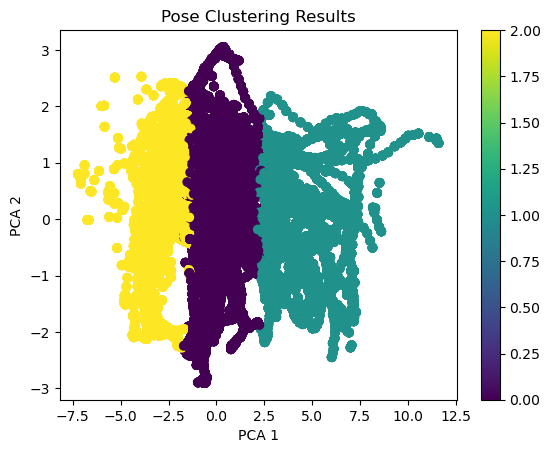

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_means = train_data.drop(columns=["act"])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_means)

inertia = []

for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(df_scaled)
train_data['Cluster'] = kmeans.labels_

# 6. 클러스터링 결과 시각화 (주성분 분석으로 2D 변환)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=train_data['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Pose Clustering Results')
plt.colorbar()
plt.show()

In [12]:
train_data.head()

,Left Elbow_visibility,Right Elbow_visibility,Left Heel_y,Right Ankle_y,Right Heel_y,Left Ankle_y,Left Foot Index_y,Right Knee_y,Left Knee_y,Right Knee_x,act,Cluster
0,0.998206,0.248336,0.489887,0.476032,0.482608,0.477828,0.482029,0.428655,0.418814,0.695089,2,2
1,0.997781,0.228736,0.485788,0.474609,0.481883,0.476690,0.481814,0.428443,0.422782,0.691489,2,2
2,0.997925,0.214251,0.481893,0.469481,0.480622,0.473902,0.480069,0.427563,0.423470,0.686111,2,2
3,0.998081,0.209648,0.481063,0.466970,0.476041,0.472662,0.478127,0.424611,0.423487,0.679919,2,2
4,0.998239,0.203808,0.479400,0.465723,0.473995,0.471088,0.477074,0.421898,0.423287,0.673840,2,2


In [13]:
train_df = train_data.drop(columns=['Cluster'], axis=1)

In [14]:
train_df.head()

,Left Elbow_visibility,Right Elbow_visibility,Left Heel_y,Right Ankle_y,Right Heel_y,Left Ankle_y,Left Foot Index_y,Right Knee_y,Left Knee_y,Right Knee_x,act
0,0.998206,0.248336,0.489887,0.476032,0.482608,0.477828,0.482029,0.428655,0.418814,0.695089,2
1,0.997781,0.228736,0.485788,0.474609,0.481883,0.476690,0.481814,0.428443,0.422782,0.691489,2
2,0.997925,0.214251,0.481893,0.469481,0.480622,0.473902,0.480069,0.427563,0.423470,0.686111,2
3,0.998081,0.209648,0.481063,0.466970,0.476041,0.472662,0.478127,0.424611,0.423487,0.679919,2
4,0.998239,0.203808,0.479400,0.465723,0.473995,0.471088,0.477074,0.421898,0.423287,0.673840,2


In [15]:
X = train_df.drop(columns=['act'])
y = train_df['act']

print(X.shape)
print(y.shape)

(62653, 10)
(62653,)


In [16]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rfc = RandomForestClassifier(max_depth=10)
rfc.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 확률
y_pred_proba = rfc.predict_proba(X_test)
y_pred = rfc.predict(X_test)

# AUC (ROC-AUC)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

# 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# 정밀도 (Precision)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)

# 재현율 (Recall)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

# F1 점수 (F1 Score)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# 결과 출력
print(f'Test AUC: {auc}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Test AUC: 0.9952616503073454
Accuracy: 0.9589817253212034
Precision: 0.9630691862291388
Recall: 0.9543084194216078
F1 Score: 0.9568231691107294


In [17]:
importance = rfc.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df.head(10)

print(top_10_features)

                  Feature  Importance
9            Right Knee_x    0.210047
0   Left Elbow_visibility    0.173877
1  Right Elbow_visibility    0.164808
4            Right Heel_y    0.080444
7            Right Knee_y    0.064781
3           Right Ankle_y    0.064248
5            Left Ankle_y    0.062692
8             Left Knee_y    0.061143
2             Left Heel_y    0.059261
6       Left Foot Index_y    0.058699


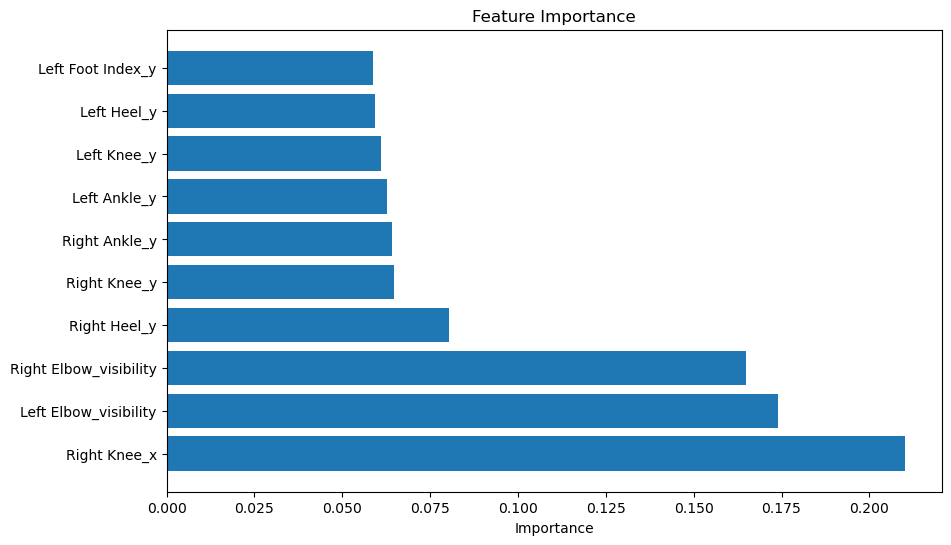

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()